In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('max.columns', 100)

In [119]:
df = pd.read_csv('/Users/ling/Desktop/ds_class/DS-SF-42/final_project/kag_risk_factors_cervical_cancer.csv')

## 1.Load in dataset and clean up data

In [120]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [121]:
#df.to_csv('/Users/ling/desktop/project_data.csv')

In [122]:
#rename columns

df.columns = [['age', 'sexual_partners', 'first_sexual_intercourse', 'num_pregnancies', 'smokes', 'smoke_years',
              'smoke_packs_per_year', 'hormonal_contraceptives', 'hormonal_contraceptive_years', 'iud', 'iud_years',
               'stds', 'stds_number', 'std_condylomatosis', 'std_cervical_condylomatosis', 
               'std_vaginal_condylomatosis', 'std_vulvo_condylomatosis', 'std_syphilis', 'std_pelvic_inflam', 
               'std_genital_herpes', 'std_molluscum_contagiosum', 'std_aids', 'std_hiv', 'std_hepatitisb', 'std_hpv',
               'std_num_diagnosis', 'std_time_since_first_diagnosis','std_time_since_last_diagnosis', 'dx_cancer', 
               'dx_cin', 'dx_hpv', 'dx', 'hinselmann', 'schiller', 'citology', 'biopsy']]

In [123]:
#rename ? to nan, convert objects to float

df = df.replace('?', np.nan)
df = df.convert_objects(convert_numeric=True)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
age                               858 non-null int64
sexual_partners                   832 non-null float64
first_sexual_intercourse          851 non-null float64
num_pregnancies                   802 non-null float64
smokes                            845 non-null float64
smoke_years                       845 non-null float64
smoke_packs_per_year              845 non-null float64
hormonal_contraceptives           750 non-null float64
hormonal_contraceptive_years      750 non-null float64
iud                               741 non-null float64
iud_years                         741 non-null float64
stds                              753 non-null float64
stds_number                       753 non-null float64
std_condylomatosis                753 non-null float64
std_cervical_condylomatosis       753 non-null float64
std_vaginal_condylomatosis        753 non-null float64
std_vulvo_condylo

In [125]:
#do all columns have values
df.sum(axis=0)

age                               23012.000000
sexual_partners                    2103.000000
first_sexual_intercourse          14463.000000
num_pregnancies                    1825.000000
smokes                              123.000000
smoke_years                        1030.664594
smoke_packs_per_year                382.906638
hormonal_contraceptives             481.000000
hormonal_contraceptive_years       1692.314401
iud                                  83.000000
iud_years                           381.470000
stds                                 79.000000
stds_number                         133.000000
std_condylomatosis                   44.000000
std_cervical_condylomatosis           0.000000
std_vaginal_condylomatosis            4.000000
std_vulvo_condylomatosis             43.000000
std_syphilis                         18.000000
std_pelvic_inflam                     1.000000
std_genital_herpes                    1.000000
std_molluscum_contagiosum             1.000000
std_aids     

In [126]:
#count nans in each column
df.isnull().sum()

age                                 0
sexual_partners                    26
first_sexual_intercourse            7
num_pregnancies                    56
smokes                             13
smoke_years                        13
smoke_packs_per_year               13
hormonal_contraceptives           108
hormonal_contraceptive_years      108
iud                               117
iud_years                         117
stds                              105
stds_number                       105
std_condylomatosis                105
std_cervical_condylomatosis       105
std_vaginal_condylomatosis        105
std_vulvo_condylomatosis          105
std_syphilis                      105
std_pelvic_inflam                 105
std_genital_herpes                105
std_molluscum_contagiosum         105
std_aids                          105
std_hiv                           105
std_hepatitisb                    105
std_hpv                           105
std_num_diagnosis                   0
std_time_sin

In [127]:
#drop column with a lot of nans, columns with no values at all 

df = df.drop(['std_time_since_first_diagnosis', 'std_time_since_last_diagnosis', 'std_aids', 
              'std_cervical_condylomatosis'], axis=1)
df.isnull().sum()

age                               0
sexual_partners                  26
first_sexual_intercourse          7
num_pregnancies                  56
smokes                           13
smoke_years                      13
smoke_packs_per_year             13
hormonal_contraceptives         108
hormonal_contraceptive_years    108
iud                             117
iud_years                       117
stds                            105
stds_number                     105
std_condylomatosis              105
std_vaginal_condylomatosis      105
std_vulvo_condylomatosis        105
std_syphilis                    105
std_pelvic_inflam               105
std_genital_herpes              105
std_molluscum_contagiosum       105
std_hiv                         105
std_hepatitisb                  105
std_hpv                         105
std_num_diagnosis                 0
dx_cancer                         0
dx_cin                            0
dx_hpv                            0
dx                          

In [128]:
#either drop columns with nan or replace with median/most common value 

#1. Option 1, drop columns with na value
#df = df.dropna(how='any')

#2. Option 2, fill valuew with the median value. 

columns = df.columns

for col in columns:
    df = df
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

age                             0
sexual_partners                 0
first_sexual_intercourse        0
num_pregnancies                 0
smokes                          0
smoke_years                     0
smoke_packs_per_year            0
hormonal_contraceptives         0
hormonal_contraceptive_years    0
iud                             0
iud_years                       0
stds                            0
stds_number                     0
std_condylomatosis              0
std_vaginal_condylomatosis      0
std_vulvo_condylomatosis        0
std_syphilis                    0
std_pelvic_inflam               0
std_genital_herpes              0
std_molluscum_contagiosum       0
std_hiv                         0
std_hepatitisb                  0
std_hpv                         0
std_num_diagnosis               0
dx_cancer                       0
dx_cin                          0
dx_hpv                          0
dx                              0
hinselmann                      0
schiller      

In [129]:
df.to_csv('/Users/ling/desktop/project_data2.csv')

## 2. EDA

In [130]:
df.describe()

,age,sexual_partners,first_sexual_intercourse,num_pregnancies,smokes,smoke_years,smoke_packs_per_year,hormonal_contraceptives,hormonal_contraceptive_years,iud,iud_years,stds,stds_number,std_condylomatosis,std_vaginal_condylomatosis,std_vulvo_condylomatosis,std_syphilis,std_pelvic_inflam,std_genital_herpes,std_molluscum_contagiosum,std_hiv,std_hepatitisb,std_hpv,std_num_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.201241,0.446278,0.686480,2.035331,0.096737,0.444604,0.092075,0.155012,0.051282,0.004662,0.050117,0.020979,0.001166,0.001166,0.001166,0.020979,0.001166,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.060623,2.210351,0.464194,3.567040,0.295771,1.814218,0.289300,0.529617,0.220701,0.068159,0.218313,0.143398,0.034139,0.034139,0.034139,0.143398,0.034139,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


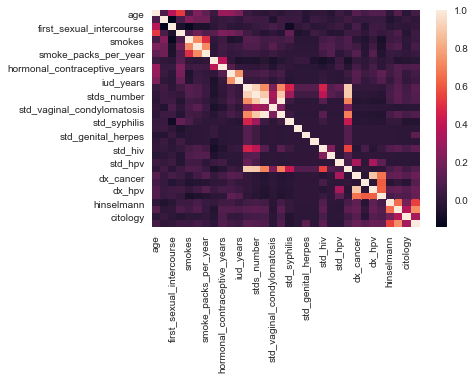

In [131]:
sns.heatmap(df.corr())
sns.set(rc={'figure.figsize':(20,20)})

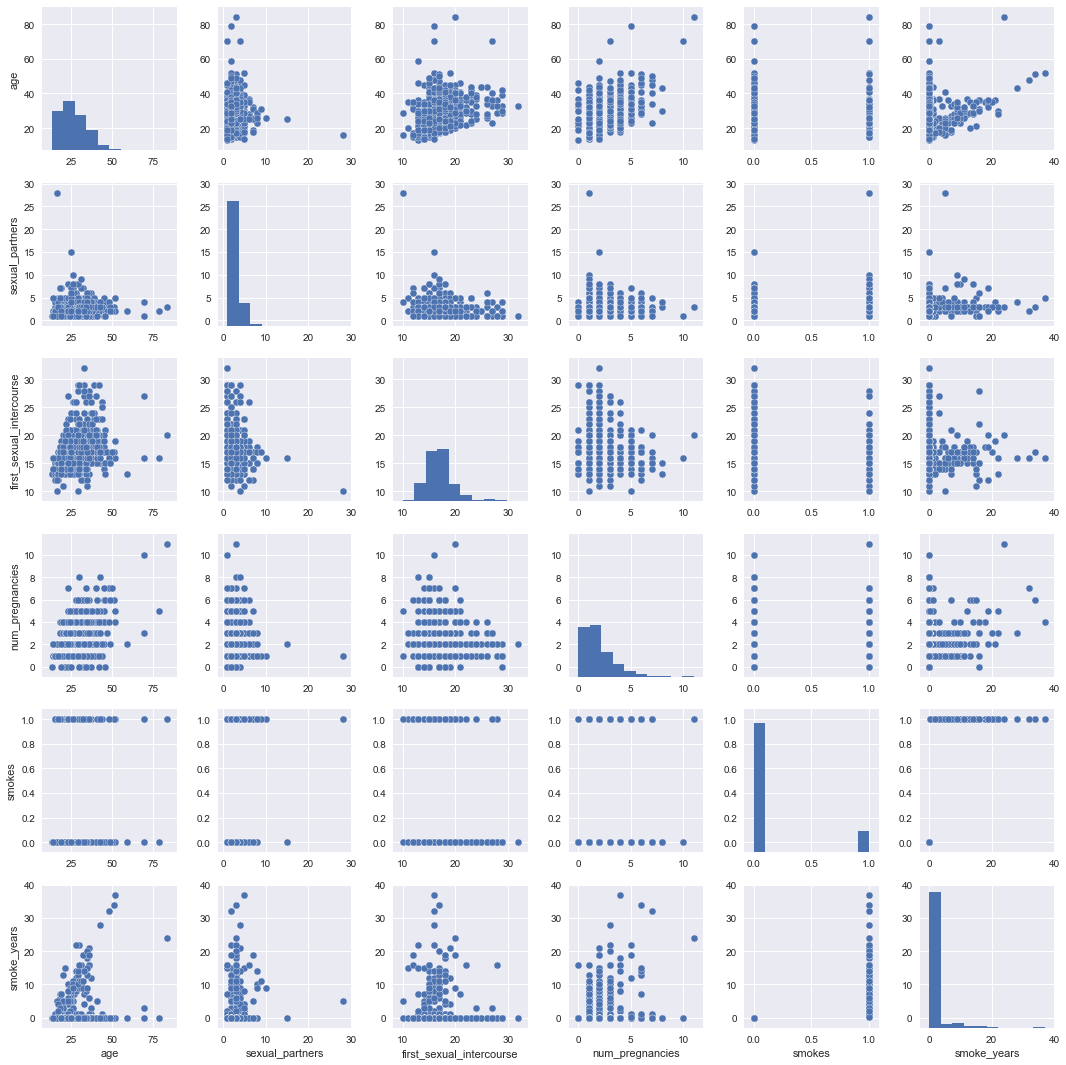

In [132]:
sns.pairplot(df.iloc[:, :6])

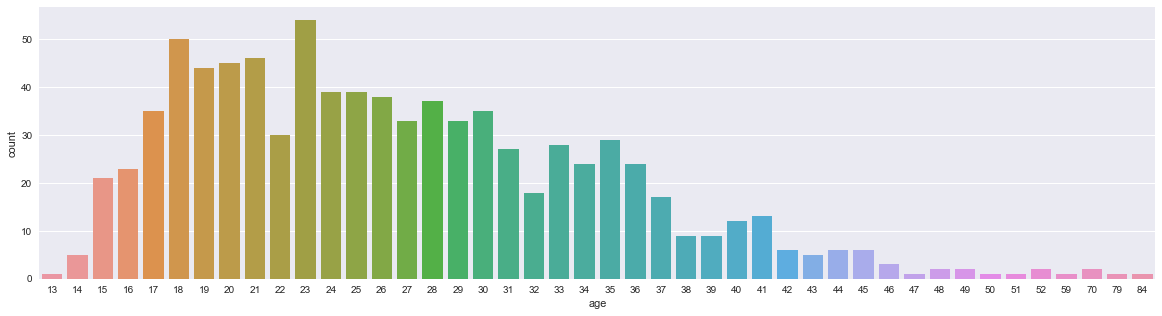

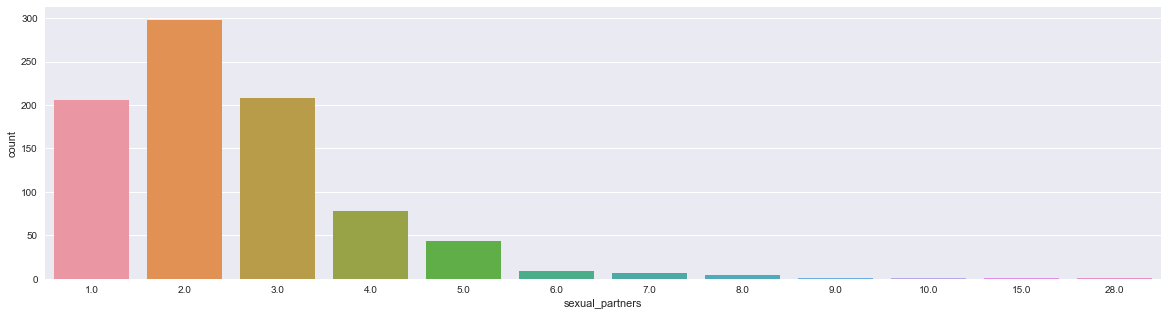

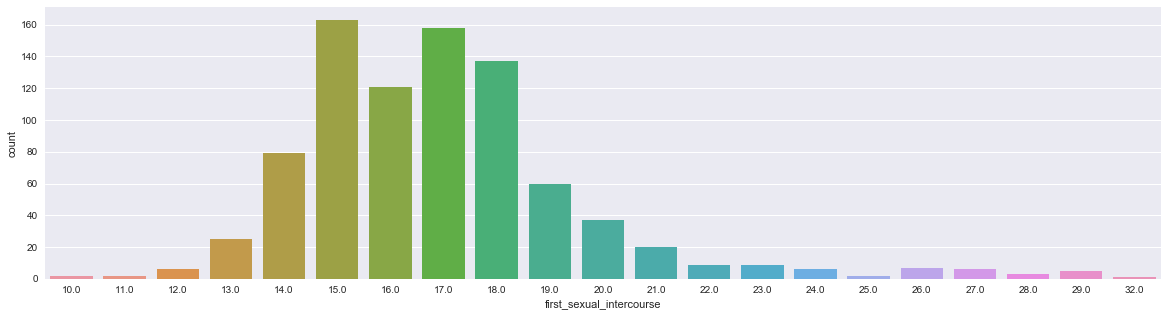

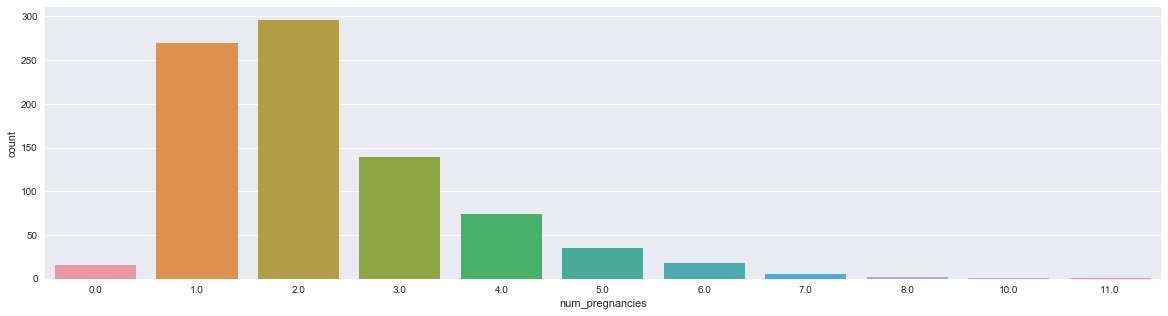

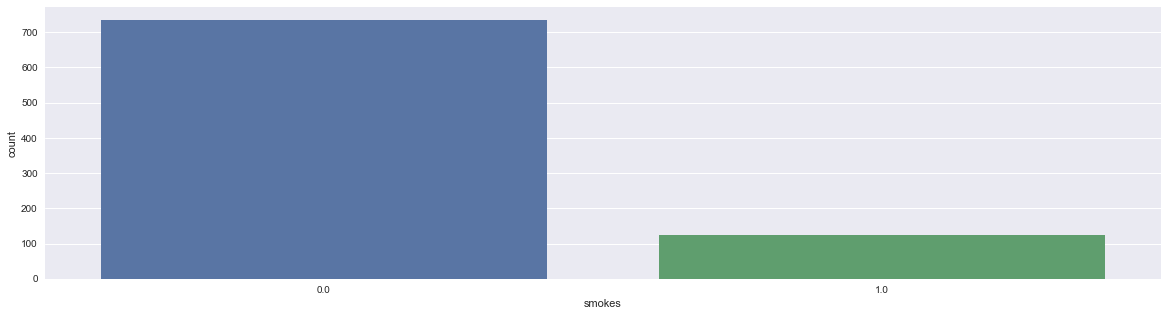

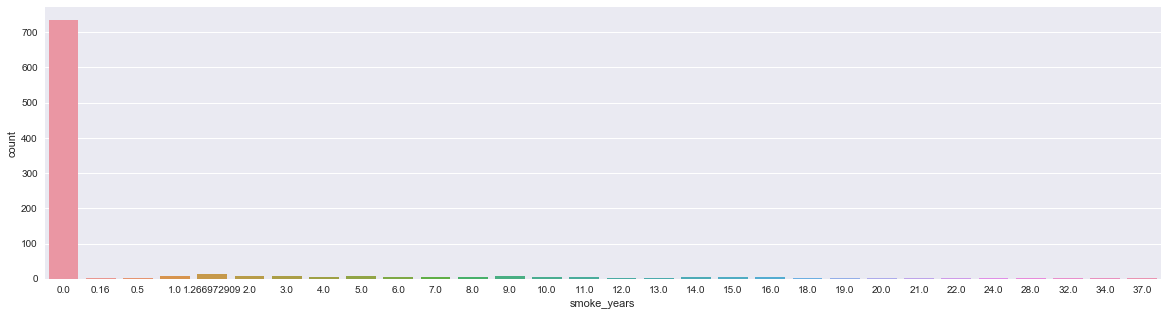

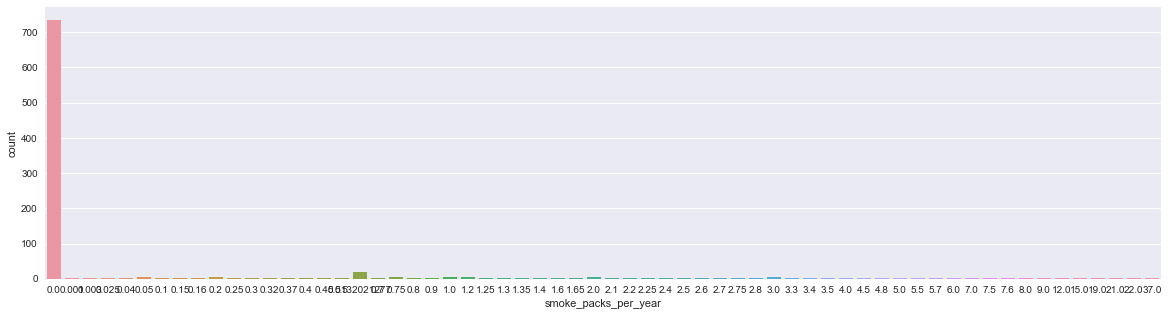

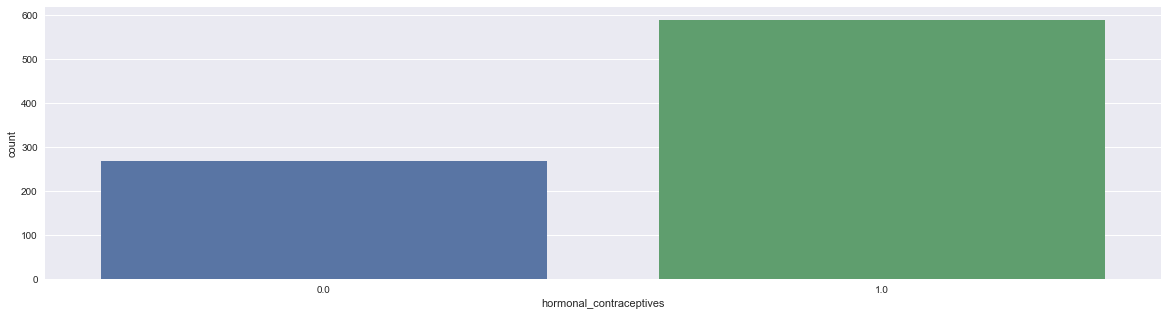

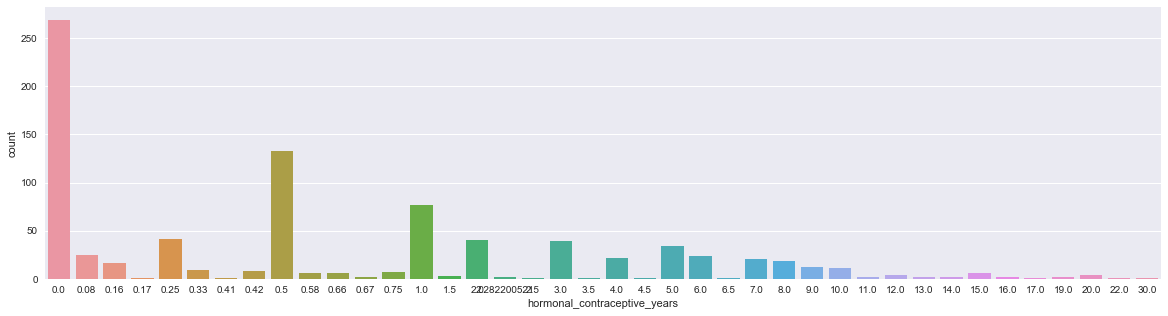

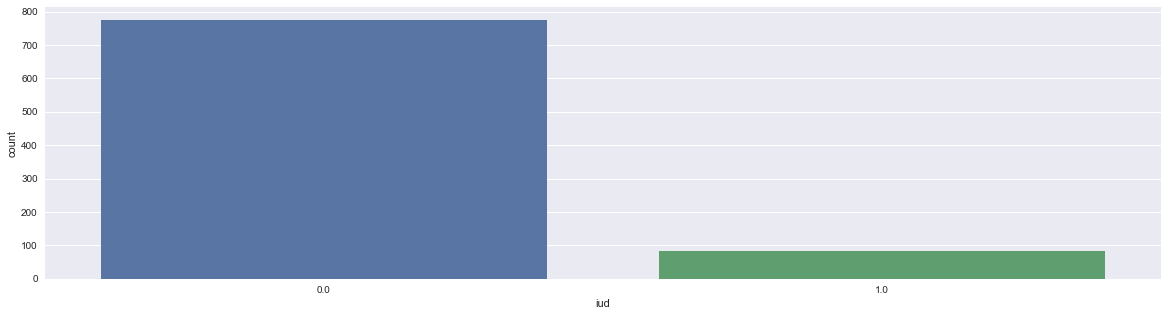

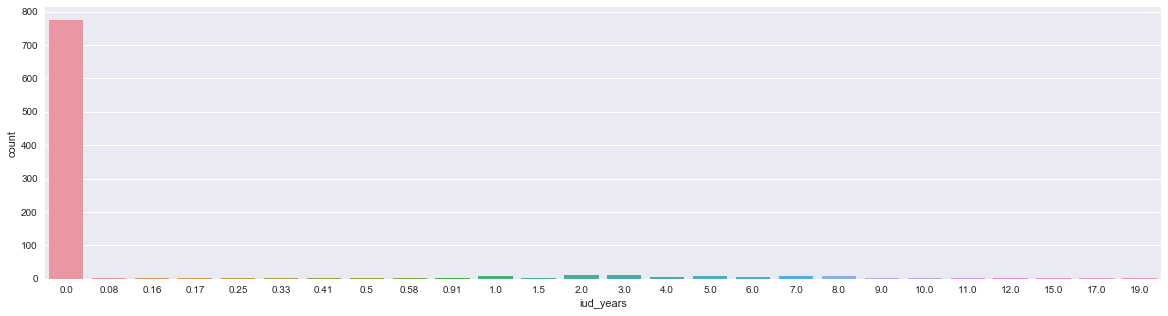

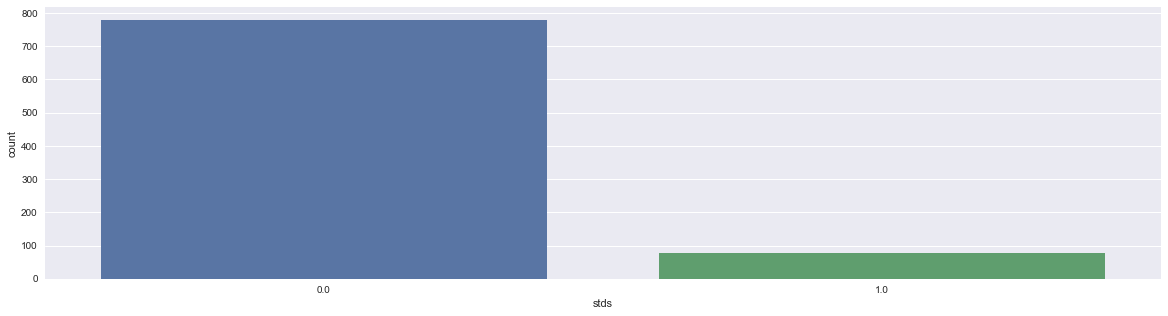

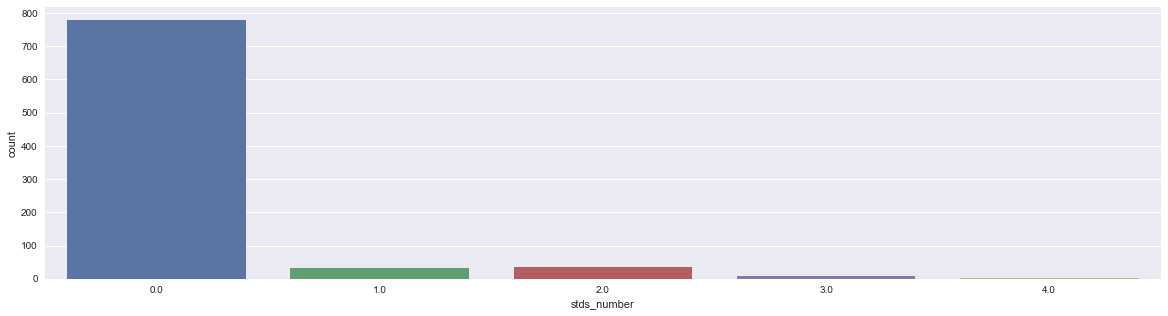

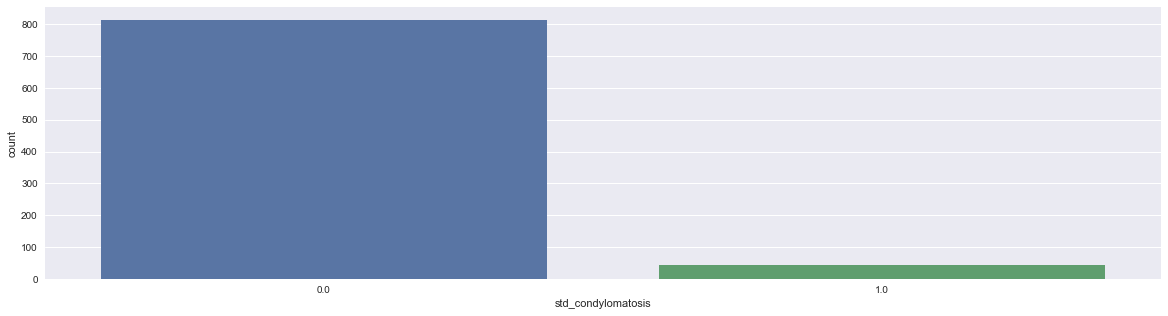

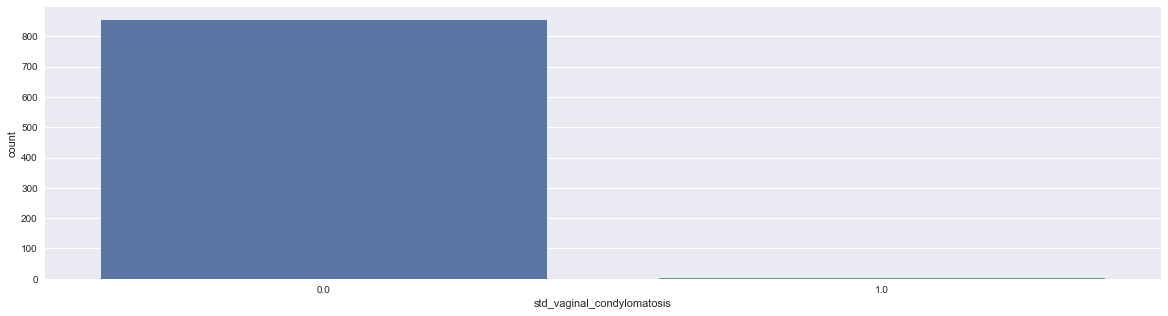

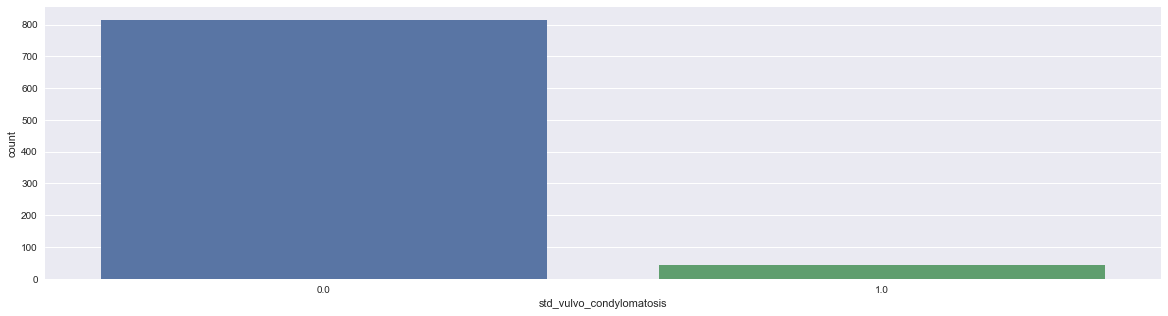

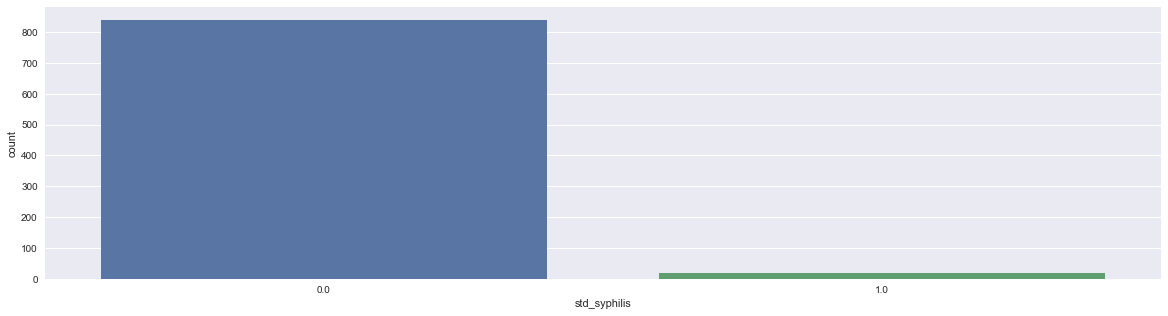

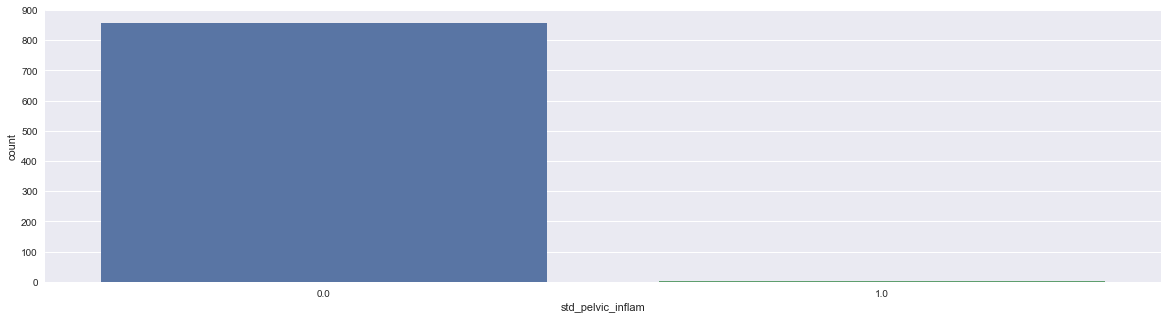

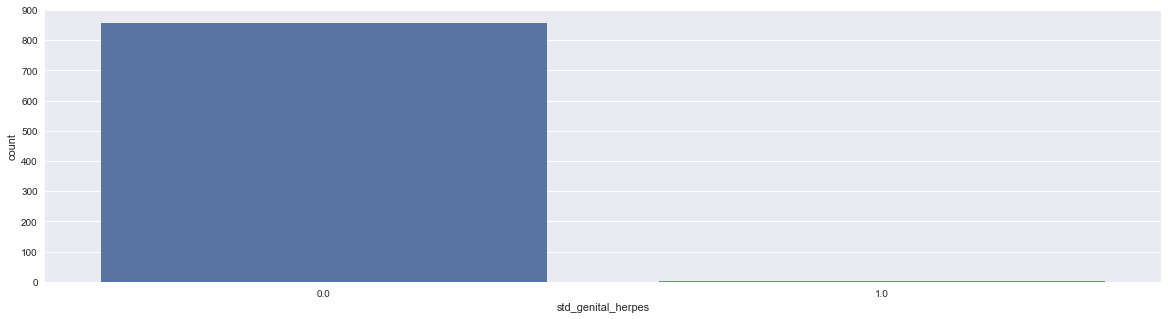

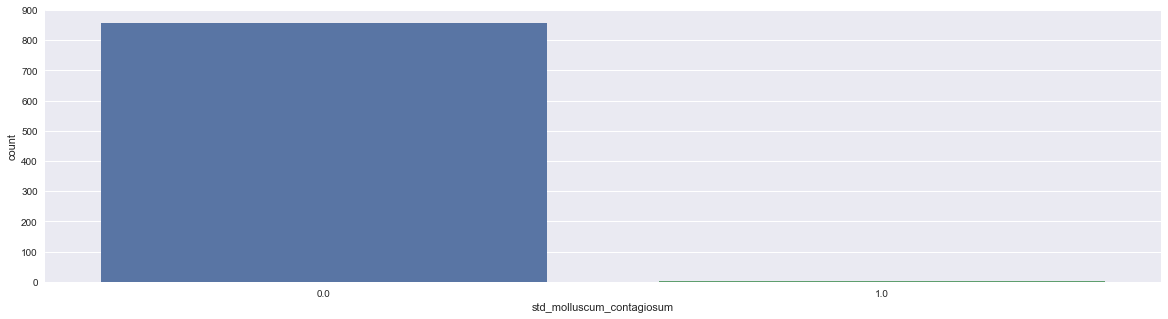

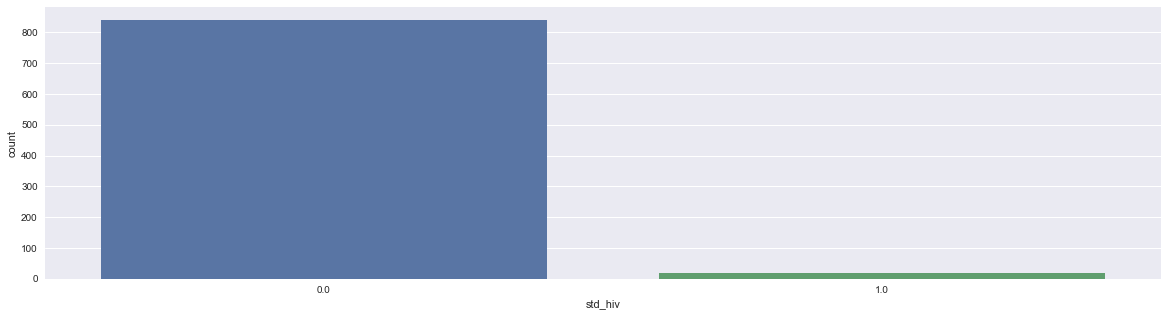

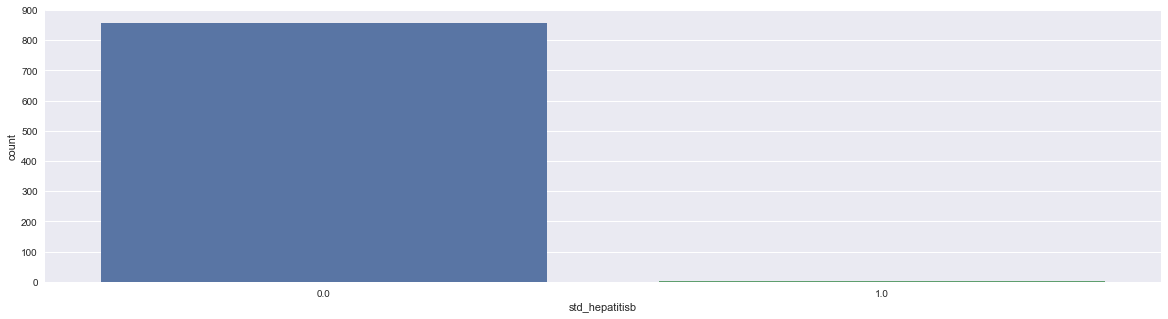

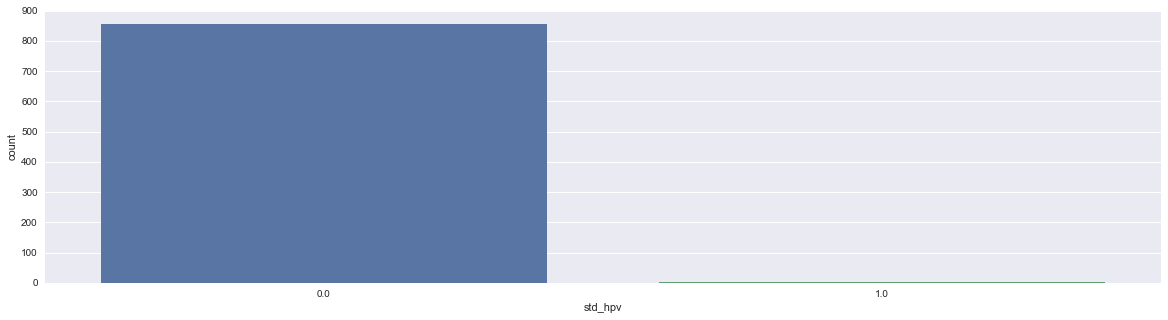

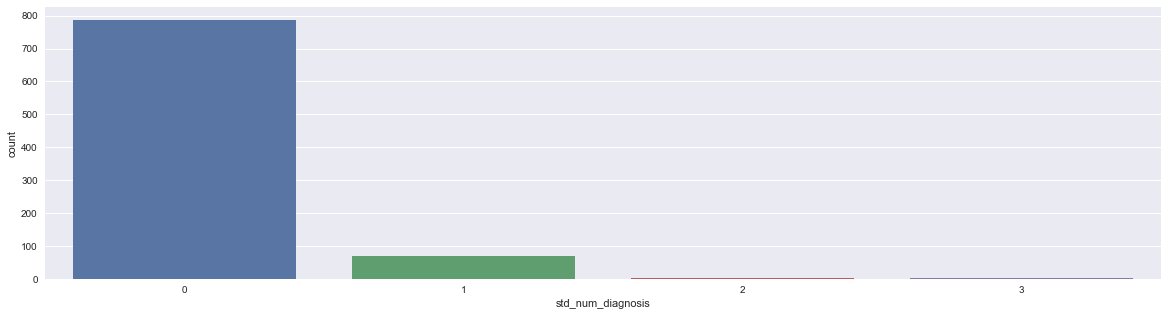

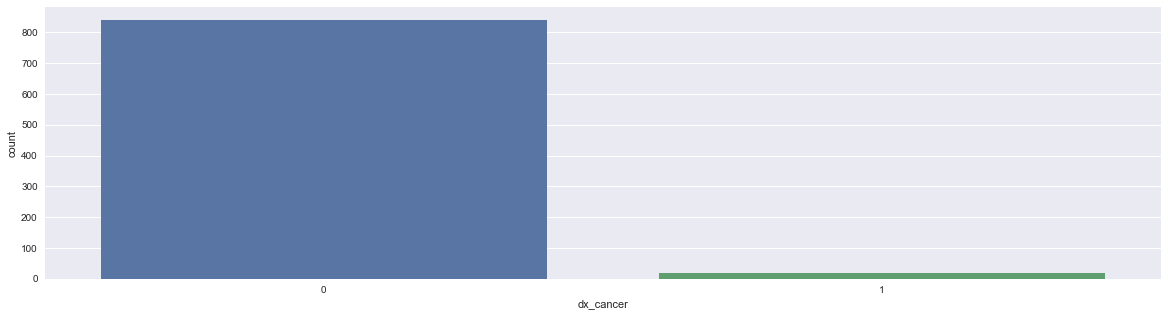

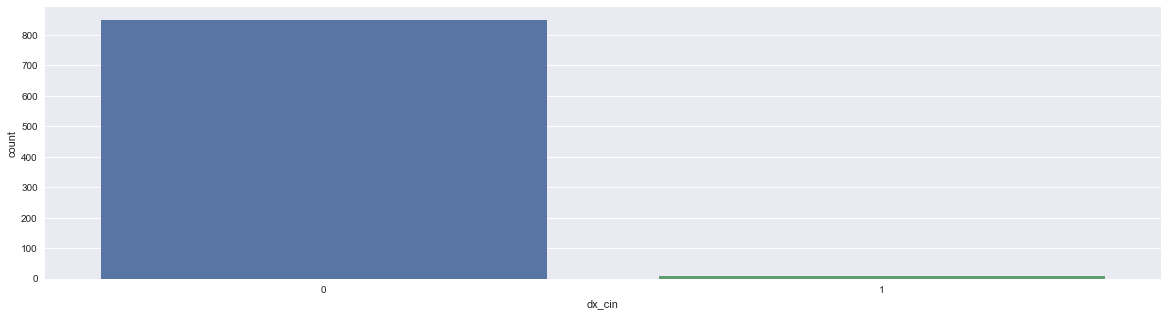

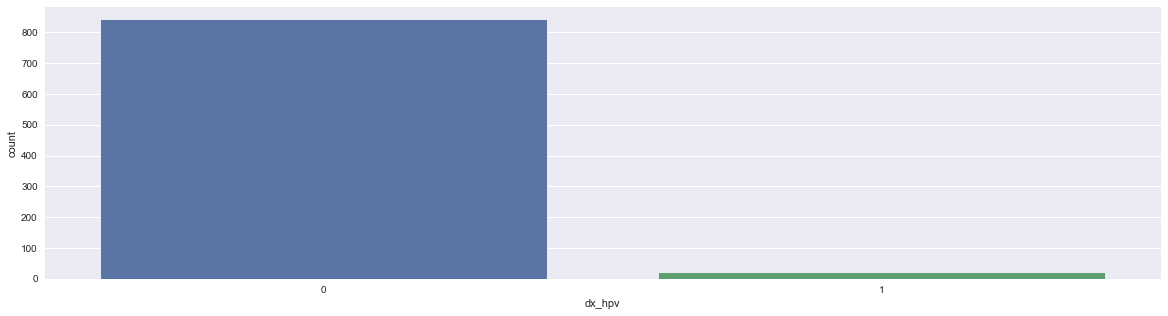

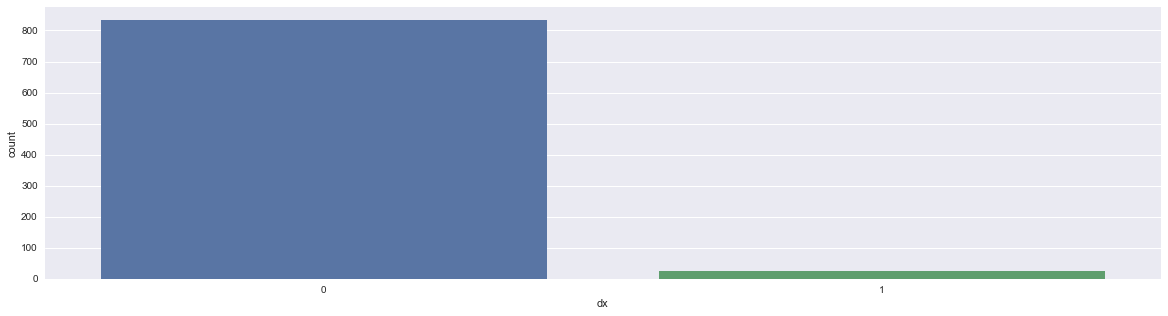

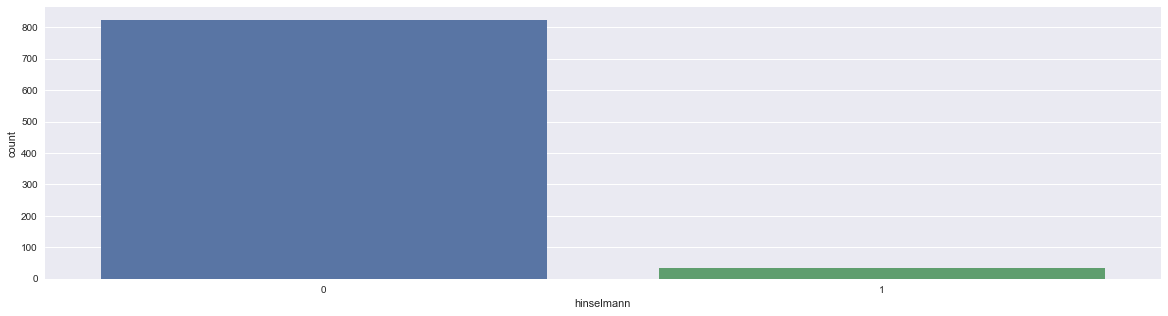

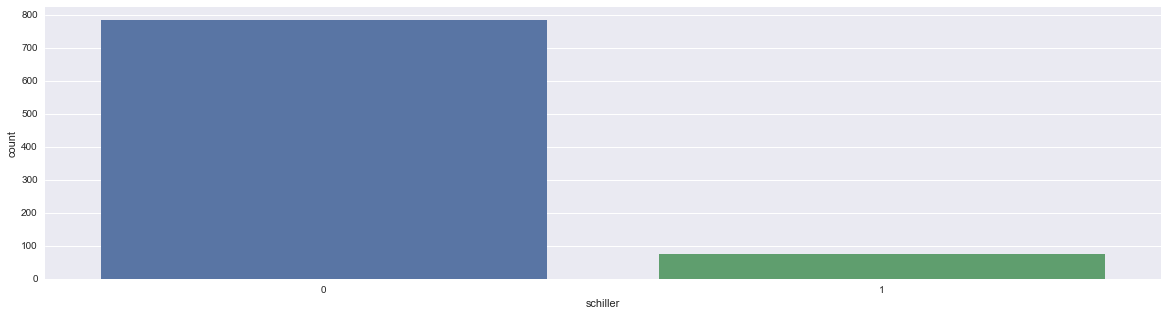

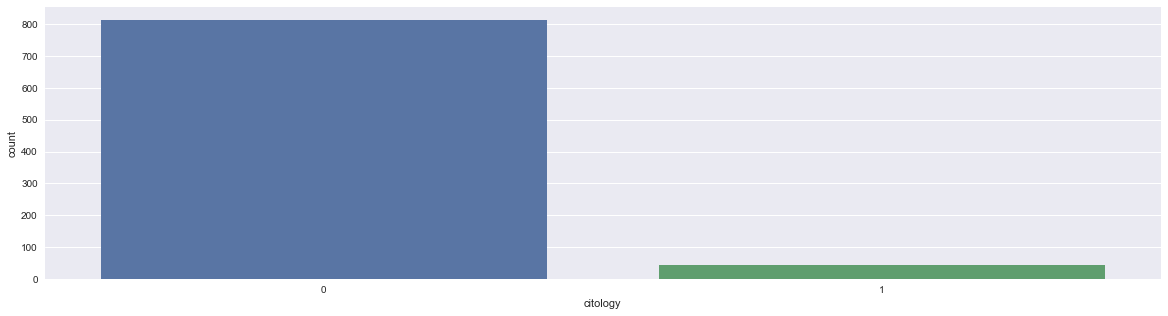

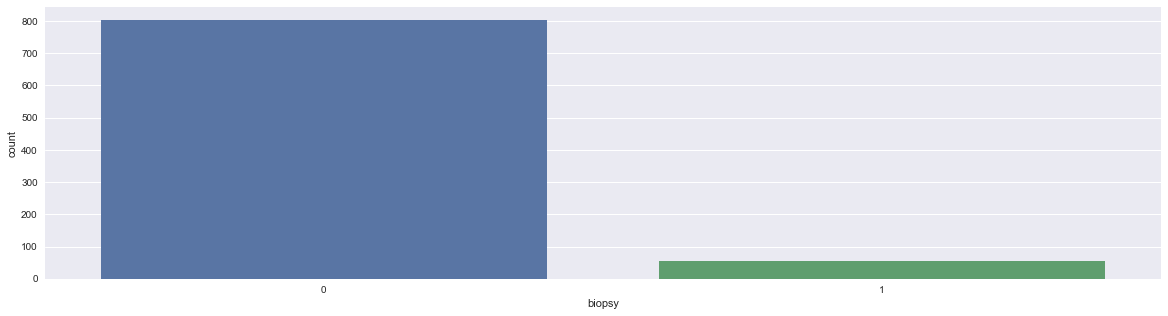

In [133]:
plot_cols = df.columns


for col in plot_cols:
    plt.subplots(figsize=(20,5))
    sns.countplot(x=col, data=df)